In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
norm=MinMaxScaler()
scaler=StandardScaler()
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
log=LogisticRegression()
clf1=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=11,n_jobs=-1)
dtree=DecisionTreeClassifier()
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score


In [ ]:
flight=pd.read_csv("/content/Airline Satisfaction.csv").iloc[:,2:]
flight
flight["Arrival Delay in Minutes"].fillna(flight["Arrival Delay in Minutes"].median(),inplace=True)

flight["Customer Type"]=flight["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
flight["Gender"]=flight["Gender"].map({"Male":1,"Female":0})
flight["Type of Travel"]=flight["Type of Travel"].map({"Business travel":1,"Personal Travel":0})
flight["Class"]=flight["Class"].map({"Business":2,"Eco":0,"Eco Plus":1})
flight["satisfaction"]=flight["satisfaction"].map({"neutral or dissatisfied":0,"satisfied":1})

In [ ]:
flight.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
X=flight.drop('satisfaction',axis=1)
X
y=flight["satisfaction"]
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

#**Question 1 of A and B**

In [ ]:
flight["satisfaction"].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [ ]:
flight.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
flight["Arrival Delay in Minutes"].fillna(flight["Arrival Delay in Minutes"].median(),inplace=True)

In [ ]:
flight.describe()[['Arrival Delay in Minutes']]

,Arrival Delay in Minutes
count,103904.000000
mean,15.133392
std,38.649776
min,0.000000
25%,0.000000
50%,0.000000
75%,13.000000
max,1584.000000


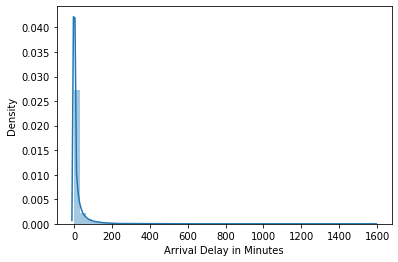

In [ ]:
sns.distplot(flight["Arrival Delay in Minutes"]);

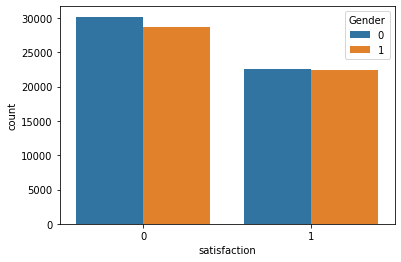

In [ ]:
sns.countplot(flight["satisfaction"],hue=flight["Gender"]);

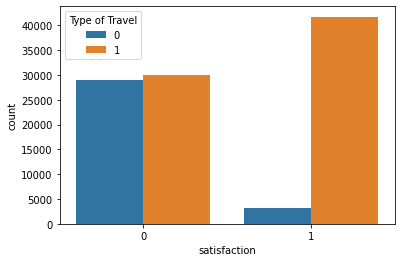

In [ ]:
sns.countplot(flight['satisfaction'],hue=flight["Type of Travel"]);

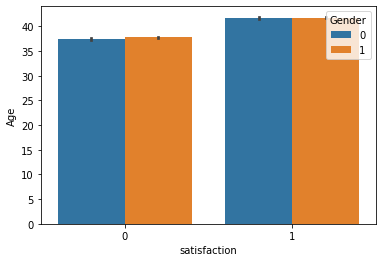

In [ ]:
sns.barplot("satisfaction","Age",hue="Gender",data=flight);

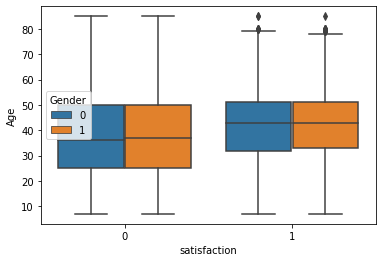

In [ ]:
sns.boxplot('satisfaction','Age',hue="Gender",data=flight);

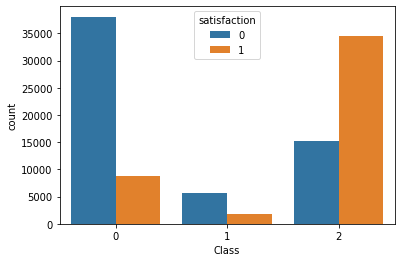

In [ ]:
sns.countplot('Class',hue='satisfaction',data=flight)

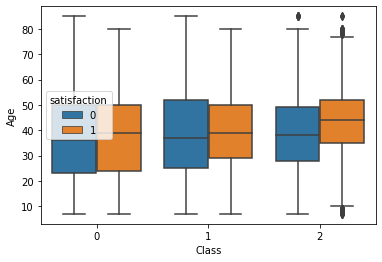

In [ ]:
sns.boxplot("Class","Age",hue="satisfaction",data=flight);

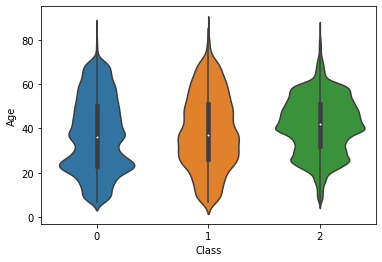

In [ ]:
sns.violinplot('Class','Age',data=flight);

In [ ]:
X=flight.drop('satisfaction',axis=1)
X
y=flight["satisfaction"]
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

In [ ]:
#Eiter Normalize the Data first Or Standardize data from below code.
for j in ['Age', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']:
            X[j]=norm.fit_transform(X[[j]])

In [ ]:
# Either Standardization the data first or Normalize data from above code
for j in ['Age', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']:
            X[j]=scaler.fit_transform(X[[j]])

In [ ]:
def ML(X,y):
    log_accu=[]
    rfc_accu=[]
    dtree_accu=[]
    rfc_oob=[]
    for i in np.arange(0,1,0.11)[1:]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
        from sklearn.linear_model import LogisticRegression
        log=LogisticRegression()
        log_model=log.fit(X_train,y_train)
        log_pred=log_model.predict(X_test)
        log_accu.append(round(accuracy_score(y_test,log_pred),3))
        
        rfc=RandomForestClassifier(max_features=None,oob_score=True)
        rfc_model=rfc.fit(X_train,y_train)
        rfc_pred=rfc.predict(X_test)
        rfc_accu.append(round(accuracy_score(y_test,rfc_pred),3))
        rfc_oob.append(round(rfc_model.oob_score_,3))
        
        dtree=DecisionTreeClassifier()
        dtree_model=dtree.fit(X_train,y_train)
        dtree_pred=dtree_model.predict(X_test)
        dtree_accu.append(round(accuracy_score(y_test,dtree_pred),3))
        
    sns.set_context('notebook')
    plt.figure(figsize=(15,5))
    plt.subplot(1,4,1)
    plt.tight_layout()
    plt.xlabel("Test Size Values for Logistic Regression")
    plt.ylabel("Accuracies with Logistic Regression")
    plt.plot(np.arange(0,1,0.11)[1:],log_accu,"black")
    plt.scatter(np.arange(0,1,0.11)[1:],log_accu)
    
    plt.subplot(1,4,2)
    plt.tight_layout()
    plt.xlabel("Test Size Values for Random Forest")
    plt.ylabel("Accuracies with Random Forest")
    plt.plot(np.arange(0,1,0.11)[1:],rfc_accu,"red")
    plt.scatter(np.arange(0,1,0.11)[1:],rfc_accu)
    
    plt.subplot(1,4,3)
    plt.tight_layout()
    plt.xlabel("Test Size Values for RF with  OOB Score")
    plt.ylabel("Accuracies with RF with OOB Socre")
    plt.plot(np.arange(0,1,0.11)[1:],rfc_oob,"pink")
    plt.scatter(np.arange(0,1,0.11)[1:],rfc_oob)
    
    plt.subplot(1,4,4)
    plt.tight_layout()
    plt.xlabel("Test Size Values for Decision Tree")
    plt.ylabel("Accuracies with Decision Tree")
    plt.plot(np.arange(0,1,0.11)[1:],dtree_accu)
    plt.scatter(np.arange(0,1,0.11)[1:],dtree_accu);

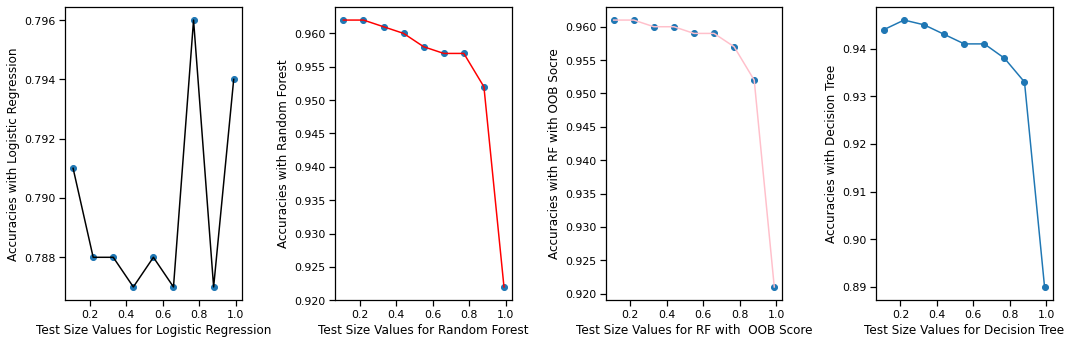

In [ ]:
ML(X,y)

**Question 1 of C and D**

In [ ]:
flight=pd.read_csv("/content/Airline Satisfaction.csv").iloc[:,2:]
flight
flight["Arrival Delay in Minutes"].fillna(flight["Arrival Delay in Minutes"].median(),inplace=True)

flight["Customer Type"]=flight["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
flight["Gender"]=flight["Gender"].map({"Male":1,"Female":0})
flight["Type of Travel"]=flight["Type of Travel"].map({"Business travel":1,"Personal Travel":0})
flight["Class"]=flight["Class"].map({"Business":2,"Eco":0,"Eco Plus":1})
flight["satisfaction"]=flight["satisfaction"].map({"neutral or dissatisfied":0,"satisfied":1})

In [ ]:
X=flight.drop('satisfaction',axis=1)
X
y=flight["satisfaction"]
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict() 
  models['bagg_dt'] = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),n_estimators=10)
  models['bagg_log'] = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10) # 10 bags
  models['bagg_rfc'] = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=11,n_jobs=-1), n_estimators=10) # 10 bags  
  return models

In [ ]:
models=get_models()
models.items()

dict_items([('bagg_dt', BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'))), ('bagg_log', BaggingClassifier(base_estimator=LogisticRegression())), ('bagg_rfc', BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=11,
                                                        n_jobs=-1)))])

In [ ]:
# create the function to evaluate the models

def evaluate_model(model, X, y):
  acc = []
  for j in range(10):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = j)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    acc.append(accuracy)
    scores=np.mean(acc) 
    return scores

In [ ]:
#run the models on the dataset
 
from numpy import mean, std
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>bagg_dt 0.961 (0.000)
>bagg_log 0.788 (0.000)
>bagg_rfc 0.960 (0.000)


**Question 1 of C**

In [ ]:
flight=pd.read_csv("/content/Airline Satisfaction.csv").iloc[:,2:]
flight.dropna()
flight["Arrival Delay in Minutes"].fillna(flight["Arrival Delay in Minutes"].median(),inplace=True)

flight["Customer Type"]=flight["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
flight["Gender"]=flight["Gender"].map({"Male":1,"Female":0})
flight["Type of Travel"]=flight["Type of Travel"].map({"Business travel":1,"Personal Travel":0})
flight["Class"]=flight["Class"].map({"Business":2,"Eco":0,"Eco Plus":1})
flight["satisfaction"]=flight["satisfaction"].map({"neutral or dissatisfied":0,"satisfied":1})

In [ ]:
flight["satisfaction"].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [ ]:
X=flight.drop('satisfaction',axis=1)
X
y=flight["satisfaction"]
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

In [ ]:
#Eiter Normalize the Data first Or Standardize data from below code.
for j in ['Age', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']:
            X[j]=norm.fit_transform(X[[j]])

In [ ]:
# Either Standardization the data first or Normalize data from above code
for j in ['Age', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']:
            X[j]=scaler.fit_transform(X[[j]])

In [ ]:
clf1=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=11,n_jobs=-1)

In [ ]:

#Ensemble Size
# evalute the bagging method based on DT for different numbers of bag size
 
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for i in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=i, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
bg_clf_cv_mean

[0.957797592842821,
 0.9591834858477887,
 0.9605886272046164,
 0.9612912059416173,
 0.9615799287185746,
 0.962253622700964,
 0.9623787461581693,
 0.962349873074615,
 0.9622536265913163]

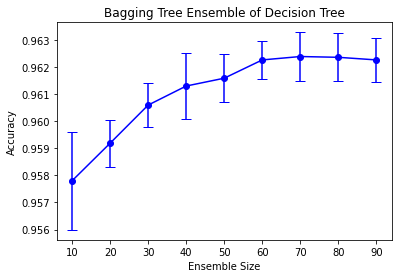

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble of Decision Tree');
plt.show()

In [ ]:

#Ensemble Size
# evalute the bagging method based on RandomForest for different numbers of bag size
 
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for i in num_est:    
    bg_clf = BaggingClassifier(base_estimator=rfc, n_estimators=i, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
bg_clf_cv_mean

[0.9549391798015173,
 0.9566330450468317,
 0.9576051046002231,
 0.9582306888182551,
 0.9577109719248638,
 0.957249013425403,
 0.9576724821682019,
 0.9574511202862848,
 0.957759099473689]

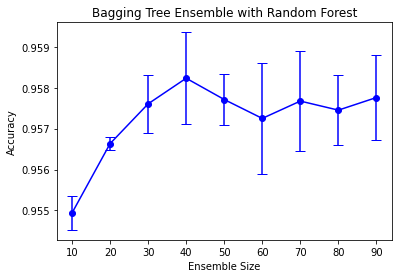

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble with Random Forest');
plt.show()

From the above plot, we can define the importance of Standard Deviation.

The standard deviation of the accuracies from the different iterations of cross-validation can be used to get a sense of how stable the model's performance is. If the standard deviation is large, it means that the model's performance is variable, and not consistent across different training and test sets. This can be an indication of overfitting, or of a model that is not generalizing well to new data. On the other hand, if the standard deviation is small, it means that the model's performance is consistent across different training and test sets, and the model is likely to generalize well to new data.

In [ ]:

#Ensemble Size
# evalute the bagging method based on Logistic Regression for different numbers of bag size
 
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for i in num_est:    
    bg_clf = BaggingClassifier(base_estimator=log, n_estimators=i, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
bg_clf_cv_mean

[0.871891384852808,
 0.871660395182491,
 0.8726709472713675,
 0.8730944235169886,
 0.8725554574380907,
 0.8729981873153356,
 0.8733831512958276,
 0.873065551822846,
 0.8731521627370399]

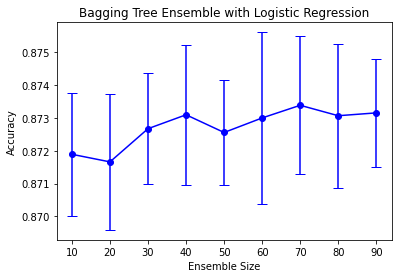

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble with Logistic Regression');
plt.show()

**ADaBOOSTING**

**Question 1**

In [ ]:
#Ensemble Size
num_est = np.arange(2,20,2)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

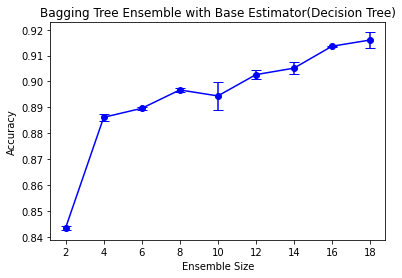

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Boosting Tree Ensemble with Base Estimator(Decision Tree)');
plt.show()

From the above plot, we can define the importance of Standard Deviation.

The standard deviation of the accuracies from the different iterations of cross-validation can be used to get a sense of how stable the model's performance is. If the standard deviation is large, it means that the model's performance is variable, and not consistent across different training and test sets. This can be an indication of overfitting, or of a model that is not generalizing well to new data. On the other hand, if the standard deviation is small, it means that the model's performance is consistent across different training and test sets, and the model is likely to generalize well to new data.

In [ ]:
#Ensemble Size
num_est = np.arange(2,20,2)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=log,n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

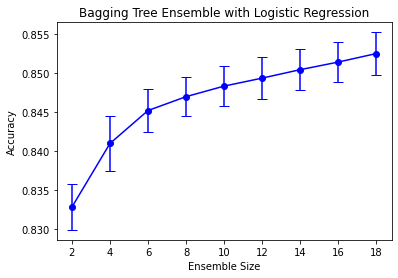

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Boosting Tree Ensemble with Logistic Regression');
plt.show()

In [ ]:
#Ensemble Size
num_est = np.arange(2,20,2)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=rfc,n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

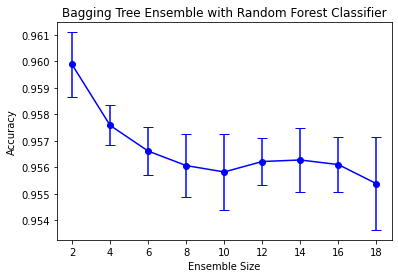

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Boosting Tree Ensemble with Random Forest Classifier');
plt.show()

In [ ]:
def get_models():
  models = dict()
  models['dt'] = DecisionTreeClassifier(criterion='entropy', max_depth=1)
  models['adaboost'] = AdaBoostClassifier(base_estimator=clf, n_estimators=10)
  return models

In [ ]:
# apply mc runs to validate the result
import numpy as np

def evaluate_model(model, X, y):
  mc=100
  acc = [] ### Blank vector
  for i in range(mc):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)# split dataset
    dt = model.fit(X_train,y_train) # fit the model
    YPred = dt.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
    return np.mean(acc)

In [ ]:
min(bg_clf_cv_std)

0.0007583889622311461

In [ ]:
bg_clf_cv_std

[0.0012190999910739238,
 0.0007583889622311461,
 0.0009228782757561411,
 0.001176804074059774,
 0.0014398356646590762,
 0.0009046058921662427,
 0.0012265635475185636,
 0.00104560511400947,
 0.0017484544295053336]

**STACKING**

In [ ]:
flight=pd.read_csv("/content/Airline Satisfaction.csv").iloc[:,2:]
flight.dropna()
flight["Arrival Delay in Minutes"].fillna(flight["Arrival Delay in Minutes"].median(),inplace=True)

flight["Customer Type"]=flight["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
flight["Gender"]=flight["Gender"].map({"Male":1,"Female":0})
flight["Type of Travel"]=flight["Type of Travel"].map({"Business travel":1,"Personal Travel":0})
flight["Class"]=flight["Class"].map({"Business":2,"Eco":0,"Eco Plus":1})
flight["satisfaction"]=flight["satisfaction"].map({"neutral or dissatisfied":0,"satisfied":1})

In [ ]:
X=flight.drop("satisfaction",axis=1)
X
y=flight["satisfaction"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
estimators=[
    ("rf",RandomForestClassifier(n_estimators=10,random_state=42)),
    ("knn",KNeighborsClassifier(n_neighbors=10)),
    ("DTree",DecisionTreeClassifier())
]

In [ ]:
clf=StackingClassifier(estimators=estimators,
                       final_estimator=LogisticRegression(),cv=10)

In [ ]:
clf.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('DTree', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9568523033491595

**Question 1 of D**

Select the best classifier and explain the advantages

In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict() 
  models['bagg_dt'] = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),n_estimators=10)
  models['bagg_log'] = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10) # 10 bags
  models['bagg_rfc'] = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=11,n_jobs=-1), n_estimators=10) # 10 bags  
  return models

In [ ]:
models=get_models()
models.items()

dict_items([('bagg_dt', BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'))), ('bagg_log', BaggingClassifier(base_estimator=LogisticRegression())), ('bagg_rfc', BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=11,
                                                        n_jobs=-1)))])

In [ ]:
# create the function to evaluate the models

def evaluate_model(model, X, y):
  acc = []
  for j in range(10):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = j)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    acc.append(accuracy)
    scores=np.mean(acc) 
    return scores

In [ ]:
#run the models on the dataset
 
from numpy import mean, std
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>bagg_dt 0.961 (0.000)
>bagg_log 0.794 (0.000)
>bagg_rfc 0.960 (0.000)


#**Choosing best models from Boosting**

In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict() 
  models['boost_dt'] = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'), n_estimators=10) # 10 steps
  models['boost_log'] = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=10) # 10 steps
  models['boost_rfc'] = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=11,n_jobs=-1), n_estimators=10) # 10 steps
  return models

In [ ]:
models=get_models()
models.items()

dict_items([('boost_dt', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_estimators=10)), ('boost_log', AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=10)), ('boost_rfc', AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=11,
                                                         n_jobs=-1),
                   n_estimators=10))])

In [ ]:
#run the models on the dataset
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>boost_dt 0.949 (0.000)
>boost_log 0.848 (0.000)
>boost_rfc 0.957 (0.000)


From the above exercises of Bagging, Boosting and Stacking I am able to find Boosting as the most appropriate Machine Learning Algorithm technique, fortunately from the graphs and above execution of codes, it's clearly visible that Decision Tree is working perfectly fine with Adaboost classifier.

#**REGRESSION**

**Question 2**

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/kc_house_data.csv").iloc[:,1:]
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.drop(columns=["lat","long"],inplace=True)

In [ ]:
data["date"]=pd.to_datetime(data["date"])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,1800,7503


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  int64         
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21611 non-null  float64       
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
data["sqft_above"].fillna(data["sqft_above"].median(),inplace=True)

In [ ]:
data.head()
n_data=data.iloc[:,1:]

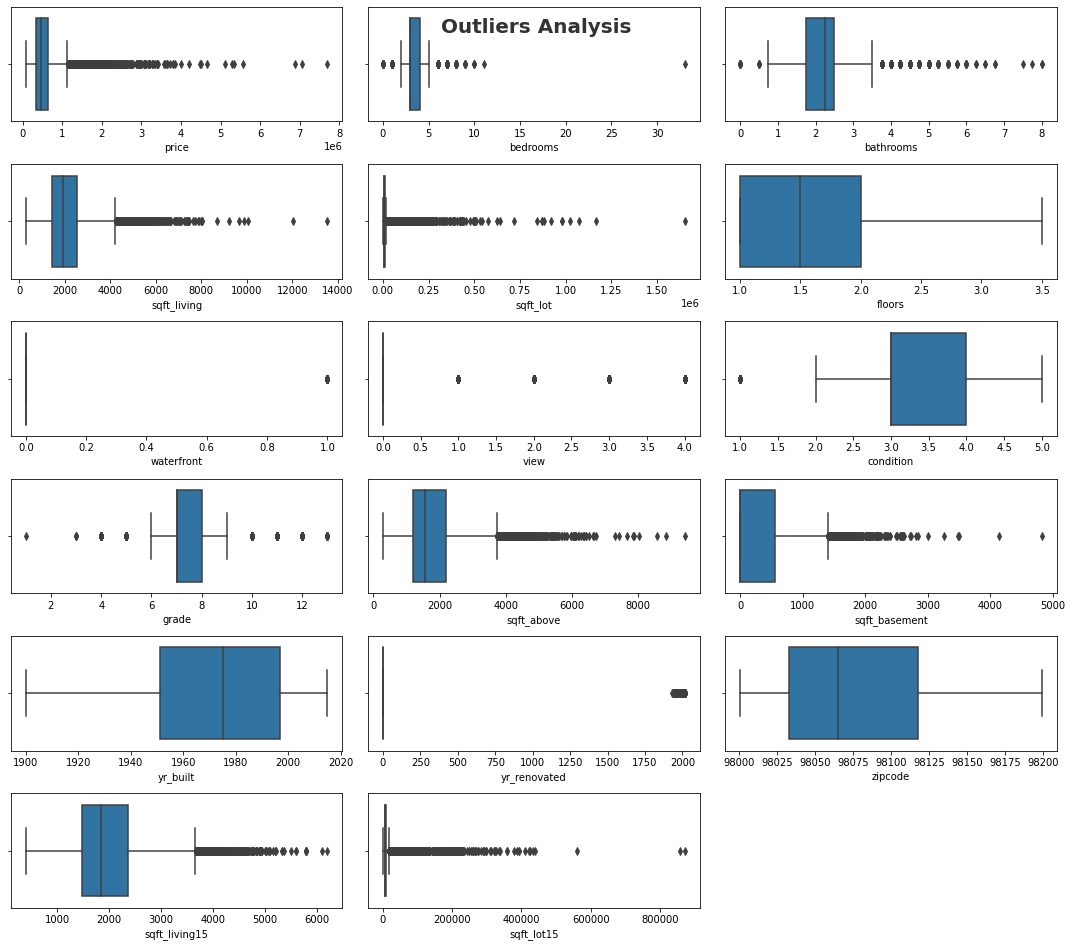

In [ ]:
#Outlier detection
plt.figure(figsize=(15,15))
plt.suptitle("Outliers Analysis", fontsize=20,fontweight="bold", alpha=0.8)
for i in range(0,len(n_data.columns)):
  plt.subplot(7,3,i+1)
  sns.boxplot(n_data[n_data.columns[i]])
  plt.tight_layout()

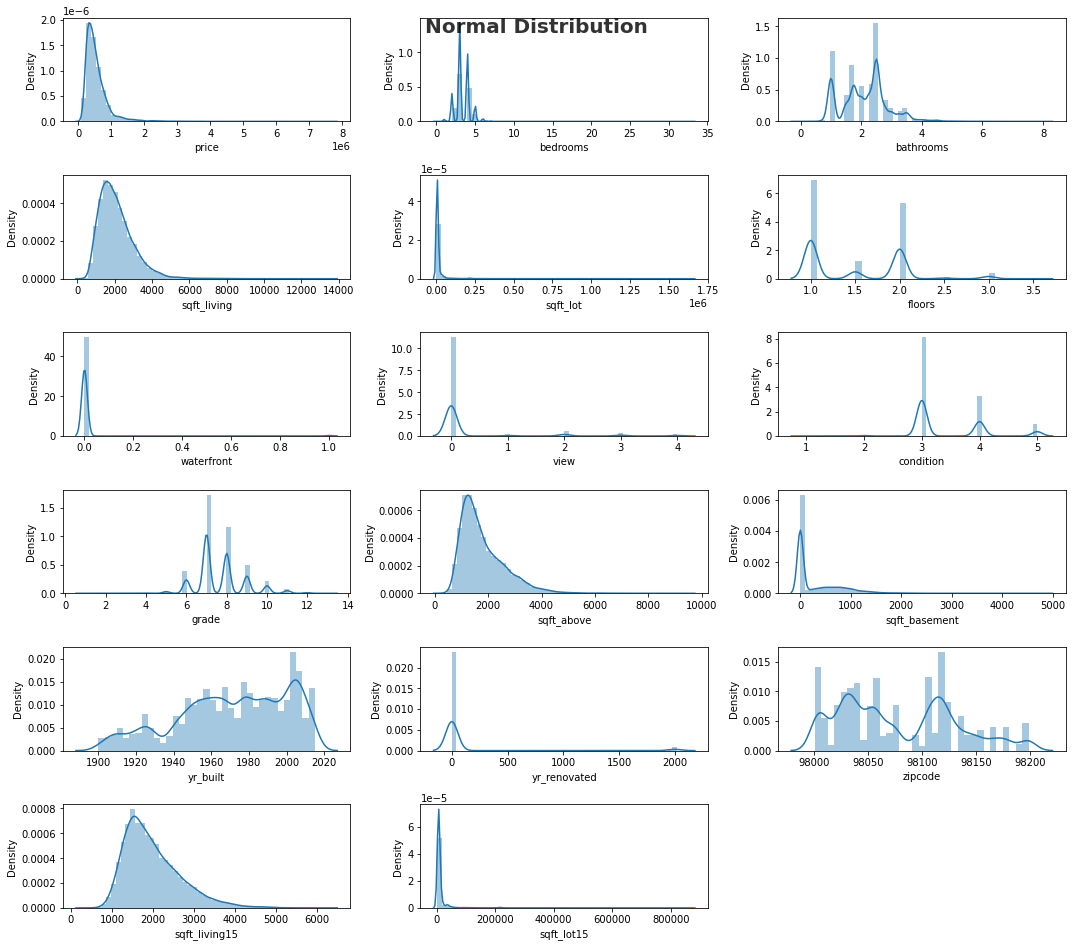

In [ ]:
#Normal Distribution
plt.figure(figsize=(15,15))
plt.suptitle("Normal Distribution", fontsize=20,fontweight="bold", alpha=0.8)
for i in range(0,len(n_data.columns)):
  plt.subplot(7,3,i+1)
  sns.distplot(n_data[n_data.columns[i]])
  plt.tight_layout()

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,1340,5650
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,1690,7639
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,2720,8062
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,1360,5000
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,1800,7503


In [ ]:
#sns.distplot(data["sqft_basement"])
data["Propert_age"]=data["date"].dt.year-data["yr_built"]
data["Renovate_age"]=data["date"].dt.year-data["yr_renovated"]

In [ ]:
data["Renovate_age"]=data["date"].dt.year-data[data["yr_renovated"]>0]["yr_renovated"]
data[data["yr_renovated"]>0]["yr_renovated"]

1        1991
35       2002
95       1991
103      2010
115      1999
         ... 
19622    1960
20057    2006
20444    2009
20447    2014
20962    2007
Name: yr_renovated, Length: 914, dtype: int64

In [ ]:
data['Renovate_age'].fillna(0,inplace=True)
data[data["Renovate_age"]>0]["Renovate_age"]

1        23.0
35       12.0
95       23.0
103       4.0
115      15.0
         ... 
19622    55.0
20057     8.0
20444     6.0
20447     1.0
20962     8.0
Name: Renovate_age, Length: 822, dtype: float64

In [ ]:
data.head()
data["Day"]=data["date"].dt.day
data["Month"]=data["date"].dt.month
data["year"]=data["date"].dt.year

In [ ]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'Propert_age', 'Renovate_age', 'Day', 'Month', 'year'],
      dtype='object')

In [ ]:
data.drop(columns=["date","yr_built","yr_renovated"],inplace=True)

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,Propert_age,Renovate_age,Day,Month,year
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,98178,1340,5650,59,0.0,13,10,2014
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,98125,1690,7639,63,23.0,9,12,2014
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,98028,2720,8062,82,0.0,25,2,2015
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,98136,1360,5000,49,0.0,9,12,2014
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,98074,1800,7503,28,0.0,18,2,2015


In [ ]:
#Splitting the Data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X=data.drop("price",axis=1)
X
y=data["price"]
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,Propert_age,Renovate_age,Day,Month,year
167,4,2.50,2680,4499,2.0,0,0,3,9,2680.0,0,98006,2920,4500,16,0.0,24,3,2015
12412,4,1.75,2340,5080,1.0,0,0,5,7,1170.0,1170,98115,1270,3270,90,0.0,1,10,2014
7691,4,2.25,2190,9020,2.0,0,0,3,8,2190.0,0,98032,2170,8400,36,0.0,12,8,2014
12460,2,1.75,2260,280962,2.0,0,2,3,9,1890.0,370,98014,2860,219542,9,0.0,23,6,2014
9099,4,1.75,2110,265716,1.0,0,0,4,8,2110.0,0,98053,2110,110597,35,0.0,26,6,2014


In [ ]:
#Data Transformation
for i in ['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'Propert_age', 'Renovate_age', 'Day', 'Month', 'year']:
  X_train[i]=scaler.fit_transform(X_train[[i]])

for i in ['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'Propert_age', 'Renovate_age', 'Day', 'Month', 'year']:
  X_test[i]=scaler.fit_transform(X_test[[i]])

#**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=11,n_jobs=-1)
dtree=DecisionTreeRegressor()
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
lr=LinearRegression()

def adjustedr2(r2,n):
  n=X_train.shape[0]
  k=X_train.shape[1]
  return 1-((1-r2)*(n-1)/(n-k-1))

**Linear Regression**

In [ ]:
lr_model=lr.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)
lr_pred
print("Mean Absolute Error value: ",mean_absolute_error(y_test,lr_pred))
print("Mean Squared Error Value: ",mean_squared_error(y_test,lr_pred))
print("Accuracy of Linear Regression: ",lr_model.score(X_train,y_train))
r2=r2_score(y_test,lr_pred)
print("Value of r2 is: ",r2)
print("Value of Adjusted R2: ",adjustedr2(r2,X_train))

Mean Absolute Error value:  143772.9845752059
Mean Squared Error Value:  50051305923.8758
Accuracy of Linear Regression:  0.6550842893552831
Value of r2 is:  0.6533039523044158
Value of Adjusted R2:  0.6528679721001525


**Decision Tree Regressor**

In [ ]:
dtree_model=dtree.fit(X_train,y_train)
dtree_pred=dtree_model.predict(X_test)
dtree_pred
print("Mean Absolute Error value: ",mean_absolute_error(y_test,dtree_pred))
print("Mean Squared Error Value: ",mean_squared_error(y_test,dtree_pred))
print("Accuracy of Linear Regression: ",dtree_model.score(X_train,y_train))
r2=r2_score(y_test,dtree_pred)
print("Value of r2 is: ",r2)
print("Value of Adjusted R2: ",adjustedr2(r2,X_train))

Mean Absolute Error value:  145504.15669339913
Mean Squared Error Value:  66721831970.40006
Accuracy of Linear Regression:  1.0
Value of r2 is:  0.5378303320530964
Value of Adjusted R2:  0.5372491404658972


**Random Forest Regressor**

In [ ]:
rfr_model=rfr.fit(X_train,y_train)
rfr_pred=rfr_model.predict(X_test)
rfr_pred
print("Mean Absolute Error value: ",mean_absolute_error(y_test,rfr_pred))
print("Mean Squared Error Value: ",mean_squared_error(y_test,rfr_pred))
print("Root Mean Squared Error Value: ",np.sqrt(mean_squared_error(y_test,rfr_pred)))
print("Accuracy of Linear Regression: ",rfr_model.score(X_train,y_train))
r2=r2_score(y_test,rfr_pred)
print("Value of r2 is: ",r2)
print("Value of Adjusted R2: ",adjustedr2(r2,X_train))

Mean Absolute Error value:  112277.68322023442
Mean Squared Error Value:  42792812194.495926
Root Mean Squared Error Value:  206864.23614171668
Accuracy of Linear Regression:  0.9629349865567783
Value of r2 is:  0.7035821826472279
Value of Adjusted R2:  0.7032094287568511


#**Bagging Regressor**

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
#bagging learnin 1
baggingreg1 = BaggingRegressor(base_estimator=lr, n_estimators=10, max_samples=0.8, max_features=0.8)
# bagging learner 2
baggingreg2 = BaggingRegressor(base_estimator=dtree, n_estimators=10, max_samples=0.8, max_features=0.8)
#bagging learning 3
baggingreg3 = BaggingRegressor(base_estimator=rfr, n_estimators=10, max_samples=0.8, max_features=0.8)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

label = [ 'Bagging linreg', 'Bagging dtree', 'Bagging RFC']
clf_list = [baggingreg1, baggingreg2, baggingreg3]
 

for clf, label  in zip(clf_list, label ):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='neg_root_mean_squared_error')
    print ("-rmse:  ",(round(scores.mean(),4), round(scores.std(),3), label))

-rmse:   (-218761.8767, 982.254, 'Bagging linreg')
-rmse:   (-174869.0006, 7428.791, 'Bagging dtree')
-rmse:   (-167895.7318, 2658.686, 'Bagging RFC')


#**Boosting Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# get a list of models to evaluate
boost_dtr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10) # 10 steps
boost_lr = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=10) # 10 steps
boost_rfr = AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=10,n_jobs=-1), n_estimators=10) # 10 steps

In [ ]:
label=["Boosting Dtree", "Boosting LR", "Boosting RFR"]
clf_list=[boost_dtr,boost_lr,boost_rfr]

for clf,label in zip(clf_list,label):
  scores=cross_val_score(clf,X,y,cv=3,scoring='neg_root_mean_squared_error')
  print ("-mse:  ",(round(scores.mean(),2), "-rmse" ,round(scores.std(),3), label))

-mse:   (-177965.79, '-rmse', 4637.518, 'Boosting Dtree')
-mse:   (-300922.3, '-rmse', 17278.721, 'Boosting LR')
-mse:   (-161837.37, '-rmse', 6640.639, 'Boosting RFR')


#**Stacking Regressor**

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
estimators=[
    ("rfr",RandomForestRegressor(n_estimators=10)),
    ("LR",LinearRegression()),
    ("DTree",DecisionTreeRegressor())
]

In [ ]:
clf=StackingRegressor(estimators=estimators,
                       final_estimator=LinearRegression(),cv=10)

In [ ]:
clf.fit(X_train,y_train)

StackingRegressor(cv=10,
                  estimators=[('rfr', RandomForestRegressor(n_estimators=10)),
                              ('LR', LinearRegression()),
                              ('DTree', DecisionTreeRegressor())],
                  final_estimator=LinearRegression())

In [ ]:
stack_pred=clf.predict(X_test)

In [ ]:
r2=r2_score(y_test,stack_pred)
print("r2 score ",r2)
print("Adjusted_R2_score", adjustedr2(r2,X_train))

r2 score  0.7349242617015771
Adjusted_R2_score 0.7345909213727884


#**Principal Component Analysis**

In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/nfl2008_fga.csv")
data.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,...,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,IND,CLE,1,47,2,IND,CLE,4.0,11.0,...,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,IND,HOU,1,54,47,IND,HOU,4.0,3.0,...,46,0,0,3287,0,0,2008,1,0,0
2,20081228,TEN,IND,1,45,20,IND,TEN,4.0,3.0,...,28,1,7,2720,7,0,2008,1,0,0
3,20081012,BAL,IND,1,45,42,IND,BAL,4.0,1.0,...,37,1,14,2742,14,0,2008,1,0,0
4,20080907,CHI,IND,1,50,56,IND,CHI,4.0,21.0,...,39,1,0,3056,0,0,2008,1,0,0


In [3]:
data.fillna(data.median(),inplace=True)

In [4]:
data.isnull().sum()

GameDate    0
AwayTeam    0
HomeTeam    0
qtr         0
min         0
sec         0
kickteam    0
def         0
down        0
togo        0
kicker      0
ydline      0
name        0
distance    0
homekick    0
kickdiff    0
timerem     0
offscore    0
defscore    0
season      0
GOOD        0
Missed      0
Blocked     0
dtype: int64

In [5]:
data.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,...,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,IND,CLE,1,47,2,IND,CLE,4.0,11.0,...,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,IND,HOU,1,54,47,IND,HOU,4.0,3.0,...,46,0,0,3287,0,0,2008,1,0,0
2,20081228,TEN,IND,1,45,20,IND,TEN,4.0,3.0,...,28,1,7,2720,7,0,2008,1,0,0
3,20081012,BAL,IND,1,45,42,IND,BAL,4.0,1.0,...,37,1,14,2742,14,0,2008,1,0,0
4,20080907,CHI,IND,1,50,56,IND,CHI,4.0,21.0,...,39,1,0,3056,0,0,2008,1,0,0


In [6]:
x1=pd.concat([pd.DataFrame(data.dtypes.values,columns=["Dtypes"]),pd.DataFrame(data.dtypes.index,columns=["Names"])],axis=1)
x1[x1["Dtypes"]==object]["Names"].values

array(['AwayTeam', 'HomeTeam', 'kickteam', 'def', 'name'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
for i in ['AwayTeam', 'HomeTeam', 'kickteam', 'def', 'name']:
  data[i]=le.fit_transform(data[i])

In [9]:
data.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,...,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,13,7,1,47,2,13,7,4.0,11.0,...,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,13,12,1,54,47,13,12,4.0,3.0,...,46,0,0,3287,0,0,2008,1,0,0
2,20081228,30,13,1,45,20,13,30,4.0,3.0,...,28,1,7,2720,7,0,2008,1,0,0
3,20081012,2,13,1,45,42,13,2,4.0,1.0,...,37,1,14,2742,14,0,2008,1,0,0
4,20080907,5,13,1,50,56,13,5,4.0,21.0,...,39,1,0,3056,0,0,2008,1,0,0


In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
new_data=pca.fit_transform(data)

In [11]:
new_data

array([[ -241.78361809, -1123.748231  ],
       [ -355.48328307, -1591.71568108],
       [ -146.29587968, -1019.36710355],
       ...,
       [ -223.22877575,  1907.06504093],
       [ -345.68351134,  2584.34253606],
       [ -439.21941113,  2440.02797782]])

In [12]:
print("variance explained by each of the variance: ",np.round(pca.explained_variance_ratio_,2))
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

variance explained by each of the variance:  [0.74 0.26]
Total variance explained by the n_components:  0.9996617056371983


From the above output, it is clearly visible that with just 2 PCA we are getting the combined variance over 90%.

In [13]:
new_data.shape[1]

2

In [14]:
pca_ratio={}
for index,i in enumerate(range(1,data.shape[1]-1)):
  pca=PCA(n_components=i)
  new_data=pca.fit_transform(data)
  pca_ratio[index]=sum(pca.explained_variance_ratio_)


In [15]:
list(pca_ratio.values())

[0.7419831734809367,
 0.9996617056371975,
 0.9997474855169005,
 0.9998161845861471,
 0.9998660743001383,
 0.9999021577884847,
 0.9999333100937007,
 0.9999618397914155,
 0.9999848493740668,
 0.9999953409850469,
 0.9999991682177087,
 0.9999994806289507,
 0.9999997722163898,
 0.9999998636839209,
 0.9999999249399834,
 0.9999999759878789,
 0.9999999947848005,
 0.9999999999999993,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998]

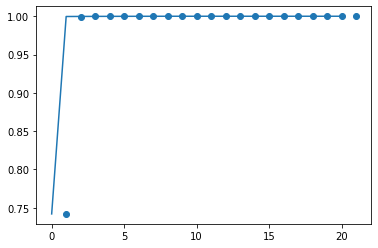

In [20]:
plt.plot(list(pca_ratio.values()));
plt.scatter(range(1,data.shape[1]-1),list(pca_ratio.values()))

#**Linear Discriminant Analysis**

###**Model the variable "qtr" to "togo","kicker" and "ydline"**

In [27]:
new_data=data.loc[:,['qtr','togo', 'kicker', 'ydline',]].copy()
new_data

,qtr,togo,kicker,ydline
0,1,11.0,15,12
1,1,3.0,15,28
2,1,3.0,15,10
3,1,1.0,15,19
4,1,21.0,15,21
...,...,...,...,...
1034,5,2.0,37,23
1035,5,13.0,7,18
1036,5,10.0,7,20
1037,5,5.0,8,29


In [30]:
X=new_data.drop(columns=["qtr"])
y=new_data["qtr"]

In [52]:
log_accu=[]
dtree_accu=[]
rfc_accu=[]
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  #LogisticRegression
  log.fit(X_train,y_train)
  log_pred=log.predict(X_test)
  log_accu.append(accuracy_score(y_test,log_pred))

  #Decision Tree
  dtree.fit(X_train,y_train)
  dtree_pred=dtree.predict(X_test)
  dtree_accu.append(accuracy_score(y_test,dtree_pred))

  #Random Forest Classifier
  rfc.fit(X_train,y_train)
  rfc_pred=rfc.predict(X_test)
  rfc_accu.append(accuracy_score(y_test,rfc_pred))



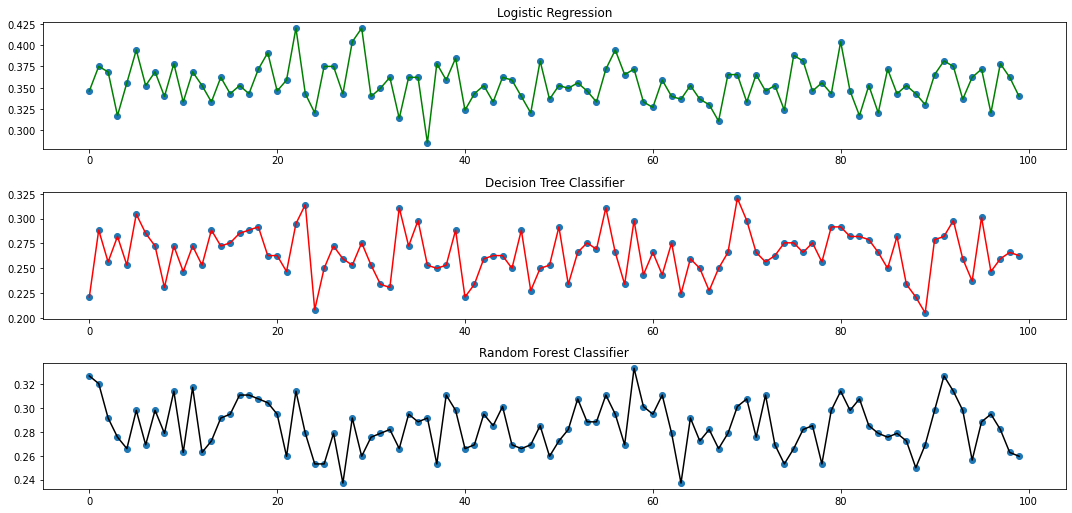

In [56]:
plt.figure(figsize=(15,7))
plt.tight_layout()
plt.subplot(3,1,1)
plt.plot(log_accu,"green")
plt.title("Logistic Regression")
plt.scatter(range(100),log_accu)

plt.tight_layout()
plt.subplot(3,1,2)
plt.plot(dtree_accu,"red")
plt.title("Decision Tree Classifier")
plt.scatter(range(100),dtree_accu)

plt.tight_layout()
plt.subplot(3,1,3)
plt.plot(rfc_accu,"black")
plt.title("Random Forest Classifier")
plt.scatter(range(100),rfc_accu);



In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=1)
lda.fit_transform(X,y)
print(sum(lda.explained_variance_ratio_))
lda.explained_variance_ratio_

0.6876271339316327


array([0.68762713])

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
lda.fit_transform(X,y)
print(sum(lda.explained_variance_ratio_))
lda.explained_variance_ratio_

0.9407252764892678


array([0.68762713, 0.25309814])

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=3)
lda.fit_transform(X,y)
print(sum(lda.explained_variance_ratio_))
lda.explained_variance_ratio_

1.0


array([0.68762713, 0.25309814, 0.05927472])

As you can observe from the above code executions, LDA with 2 components is giving the best variance with over 94% combined.